In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read the data
df = pd.read_csv(r'C:\Users\Joseph\OneDrive\Desktop\movies.csv')

In [18]:
print(df.head(3))
df.dtypes

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   

         gross            company  runtime  
0   46998772.0       Warner Bros.    146.0  
1   58853106.0  Col

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [19]:
# check for missing data
nullcount = df.isna().sum()
print(nullcount)

# remove missing data
df = df.dropna()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [20]:
# some columns are unnecesarily float. change to int.
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int')
df['gross'] = df['gross'].astype('int64')

# Check if runtime needs to be float
decimaldiff = df['runtime'] - df['runtime'].round()
diff = decimaldiff.sum()
if diff == 0:
    df['runtime'] = df['runtime'].astype('int')

In [21]:
print(df[['year', 'released']].head(3))

# some rows have years that do not match the date. create corrected year column.
df['yearcorrect'] = df['released'].str.extract(pat='([0-9]{4})').astype('int')

   year                       released
0  1980  June 13, 1980 (United States)
1  1980   July 2, 1980 (United States)
2  1980  June 20, 1980 (United States)


In [22]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997


In [23]:
pd.set_option('display.max_rows', None)

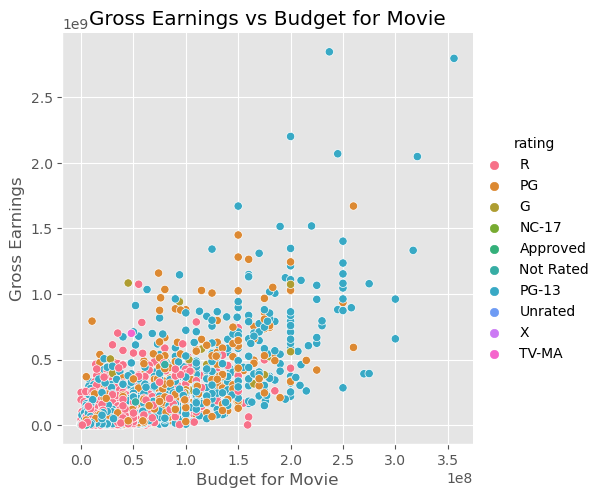

In [24]:
# Check correlation between budget and gross through a scatter plot

sns.relplot(x='budget', y='gross', data=df, kind='scatter', hue='rating')
plt.title('Gross Earnings vs Budget for Movie')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Movie')
plt.show()

In [25]:
# a positive relationship can be observed from the scatter plot. Check the correlation coefficients
df['budget'].corr(df['gross'])

0.740246543921963

In [26]:
# A correlation coefficient of 0.7449283920379263 indicates a strong positive linear relationship between budget and gross

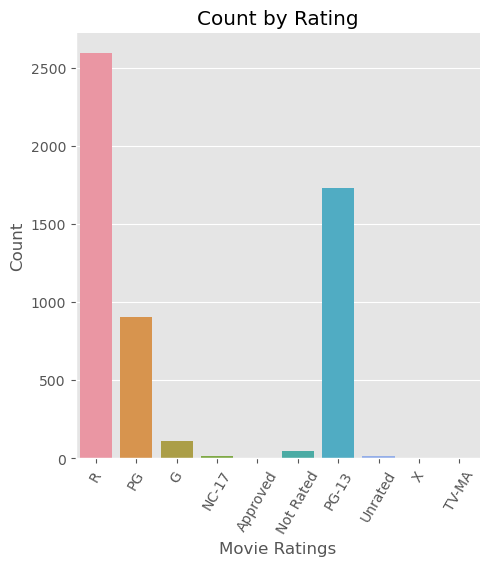

In [27]:
# check the frequency of each rating
sns.catplot(x='rating', data=df, kind='count')
plt.xticks(rotation=60)
plt.title('Count by Rating')
plt.ylabel('Count')
plt.xlabel('Movie Ratings')
plt.show()

In [28]:
# The results show that a significant amount of the movies in the dataset are rated R.
# PG-13 is the second most common followed by PG.

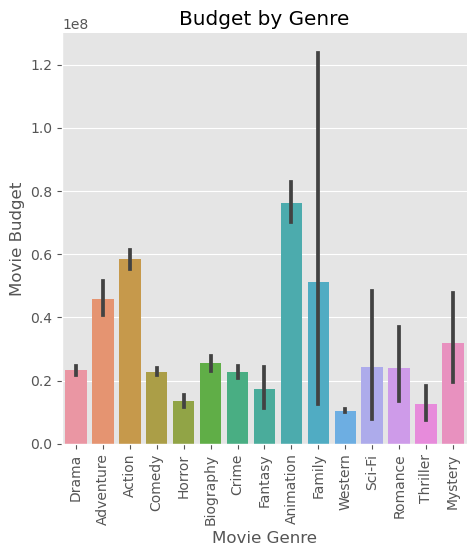

In [29]:
# Check relationship between genres and budget

sns.catplot(x='genre', y='budget', kind='bar', data=df)
plt.xticks(rotation=90)
plt.title('Budget by Genre')
plt.ylabel('Movie Budget')
plt.xlabel('Movie Genre')
plt.show()

In [30]:
# the barplot shows that Animated films have the highest average budget.
# On the other hand, family movies show significant variation in the budget

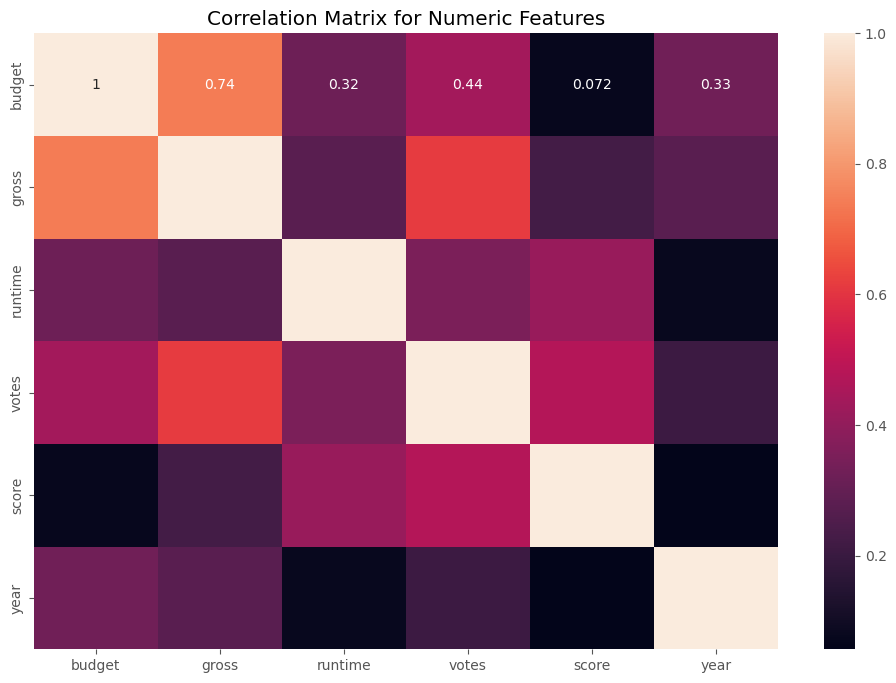

In [31]:
# Check the correlation among the rest of the numerical variables

correlation_matrix = df[['budget', 'gross', 'runtime', 'votes', 'score', 'year', ]].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()